In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import pickle

In [2]:
X_train = pickle.load(open('../Data/train_enc.pkl', 'rb'))
X_test = pickle.load(open('../Data/test_enc.pkl', 'rb'))
y_train = pickle.load(open('../Data/y_train.pkl', 'rb'))
y_test = pickle.load(open('../Data/y_test.pkl', 'rb'))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([329, 64])
torch.Size([83, 64])
(329,)
(83,)


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
parameters = [{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
              {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

# Create a GridSearchCV object
search = GridSearchCV(SVC(probability=True), parameters, n_jobs=-1, verbose=2, cv=3)

# Fit the grid search to the data
search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             verbose=2)

In [4]:
best_params = search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [5]:
best_model = search.best_estimator_
best_model

SVC(C=0.1, gamma=0.1, probability=True)

In [6]:
search.cv_results_

{'mean_fit_time': array([0.06219228, 0.07395665, 0.08893879, 0.06780473, 0.09945146,
        0.10465916, 0.09472211, 0.11034266, 0.11046211, 0.10531648,
        0.10928194, 0.10738548, 0.10947649, 0.11135793, 0.10615087,
        0.111576  , 0.10939558, 0.11391854, 0.12589351, 0.11018499,
        0.12142658, 0.12653597, 0.12847408, 0.12783305, 0.11059332,
        0.1222713 , 0.1396203 , 0.12097295, 0.12683082, 0.12101022,
        0.12873538, 0.12156161, 0.11269275, 0.13933476, 0.12921596,
        0.12879825, 0.14594523, 0.13156192, 0.12373694, 0.09267815]),
 'std_fit_time': array([2.59741840e-02, 4.97694141e-02, 6.84950598e-02, 4.61798945e-02,
        1.12391596e-07, 7.36451553e-03, 7.36580861e-03, 7.36603356e-03,
        7.44661759e-03, 7.36670716e-03, 6.63497883e-03, 7.36586469e-03,
        1.03326090e-02, 7.36423455e-03, 7.36389737e-03, 4.27532012e-03,
        7.36614645e-03, 7.36339166e-03, 9.56806516e-03, 5.44121493e-03,
        6.40422952e-03, 1.47289188e-02, 1.74662722e-02, 9.379

In [7]:
train_acc = search.best_score_     # this is train accuracy
print("Train Accuracy:", train_acc)    

Train Accuracy: 0.8054767862107312


In [8]:
from sklearn.metrics import accuracy_score

y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8072289156626506


In [9]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_test)
print("AUC Score:", auc_score)

AUC Score: 0.5


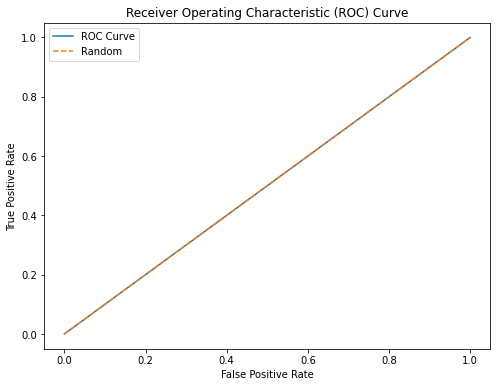

In [11]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[ 0, 16],
       [ 0, 67]], dtype=int64)